In [4]:
from google.colab import drive

In [5]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
import numpy as np
import pandas as pd
import cv2
import os

In [6]:
drive.mount('/content/drive')#connect drive to colab

Mounted at /content/drive


In [7]:
Datadir='/content/drive/MyDrive/Mini_Project_V'
category=["PNEUMONIA","NORMAL"]
dataset=[]
size=150
ct=0
ct1=0
for types in category:
    path=os.path.join(Datadir,types)
    ex=0
    for img in os.listdir(path):
        if types=='PNEUMONIA':
            ex=1
            ct=ct+1;
        else :
            ct1=ct1+1;
            ex=0
        try :
            img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img=cv2.resize(img_arr ,(size,size),interpolation=cv2.INTER_AREA)
            dataset.append([new_img,ex])
        except Exception as e:
            pass

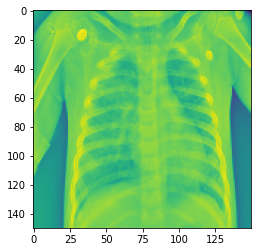

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(dataset[0][0])

In [9]:
import random
random.shuffle(dataset)
X=[]
Y=[]
for features,label in dataset:
  X.append(features)
  Y.append(label)

X=np.array(X).reshape(-1,size,size,1)


X=X/225
Y=np.array(Y)

In [10]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state=50)

ANN

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(size,size)))
model.add(BatchNormalization(axis=1))
model.add(Dense(408,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(104,activation='relu'))
model.add(BatchNormalization(axis=1))
model.add(Dense(32,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])#0.01

In [13]:
from keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger
filepath="/content/drive/MyDrive/saved_models/CatvsDog-{epoch:02d}-{val_accuracy:.2f}.hdf5"

# save the model with the best validation (development) accuracy till now
earlystopping = EarlyStopping(monitor='val_loss',patience=8,verbose=1)


callback_list=[earlystopping]

In [14]:
history=model.fit(X_train,Y_train,epochs=15,validation_split=0.2,callbacks=callback_list)

Epoch 1/15
95/95 [==============================] - 11s 103ms/step - loss: 0.1857 - accuracy: 0.9238 - val_loss: 0.3927 - val_accuracy: 0.7984
Epoch 2/15
95/95 [==============================] - 10s 108ms/step - loss: 0.1176 - accuracy: 0.9558 - val_loss: 0.1389 - val_accuracy: 0.9565
Epoch 3/15
95/95 [==============================] - 10s 109ms/step - loss: 0.0839 - accuracy: 0.9693 - val_loss: 0.1574 - val_accuracy: 0.9249
Epoch 4/15
95/95 [==============================] - 9s 98ms/step - loss: 0.0690 - accuracy: 0.9746 - val_loss: 0.0967 - val_accuracy: 0.9657
Epoch 5/15
95/95 [==============================] - 10s 106ms/step - loss: 0.0530 - accuracy: 0.9792 - val_loss: 0.0928 - val_accuracy: 0.9644
Epoch 6/15
95/95 [==============================] - 10s 108ms/step - loss: 0.0588 - accuracy: 0.9805 - val_loss: 0.1029 - val_accuracy: 0.9618
Epoch 7/15
95/95 [==============================] - 11s 114ms/step - loss: 0.0537 - accuracy: 0.9782 - val_loss: 0.1042 - val_accuracy: 0.9631
E

In [15]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)

30/30 [==============================] - 1s 25ms/step


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.9620253164556962

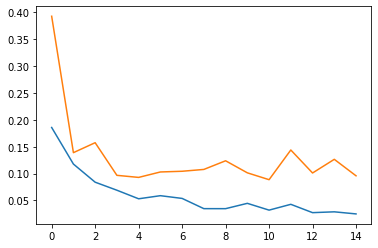

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


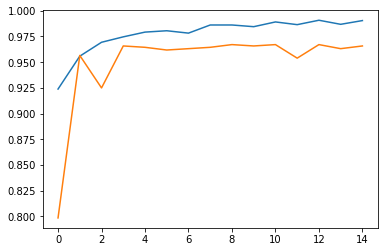

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
#saving model
model.save_weights("/content/drive/MyDrive/Mini_Project_V/TESTANN.hdf5",overwrite=True)

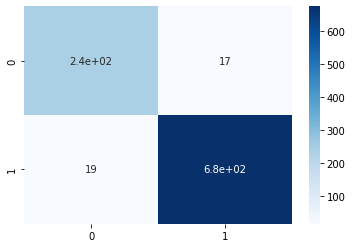

In [20]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, cmap='Blues')

CNN

In [21]:
model1=Sequential()

model1.add(Conv2D(16,(3,3),activation='relu',input_shape=(size,size,1)))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPool2D((2,2)))
model1.add(Flatten())
model1.add(Dense(16,activation='relu'))
model1.add(BatchNormalization(axis=1))
model1.add(Dense(1,activation='sigmoid'))

In [22]:
Y_train=np.reshape(Y_train,(3791,1))
Y_train.shape

(3791, 1)

In [24]:
model1.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history2=model1.fit(X_train,Y_train,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
48/48 [==============================] - 64s 1s/step - loss: 0.2895 - accuracy: 0.9004 - val_loss: 0.4848 - val_accuracy: 0.9420
Epoch 2/15
48/48 [==============================] - 65s 1s/step - loss: 0.1600 - accuracy: 0.9637 - val_loss: 0.3221 - val_accuracy: 0.8116
Epoch 3/15
48/48 [==============================] - 60s 1s/step - loss: 0.1168 - accuracy: 0.9769 - val_loss: 0.2514 - val_accuracy: 0.9249
Epoch 4/15
48/48 [==============================] - 64s 1s/step - loss: 0.1088 - accuracy: 0.9855 - val_loss: 0.2139 - val_accuracy: 0.9117
Epoch 5/15
48/48 [==============================] - 59s 1s/step - loss: 0.0738 - accuracy: 0.9921 - val_loss: 0.1847 - val_accuracy: 0.9183
Epoch 6/15
48/48 [==============================] - 58s 1s/step - loss: 0.0525 - accuracy: 0.9957 - val_loss: 0.1129 - val_accuracy: 0.9736
Epoch 7/15
48/48 [==============================] - 59s 1s/step - loss: 0.0414 - accuracy: 0.9984 - val_loss: 0.1241 - val_accuracy: 0.9631
Epoch 8/15
48/48 [==

In [26]:
y_prob=model1.predict(X_test)
y_prob=y_prob>0.5
accuracy_score(Y_test,y_pred)

30/30 [==============================] - 5s 153ms/step


0.9620253164556962

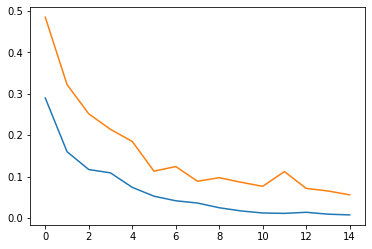

In [27]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

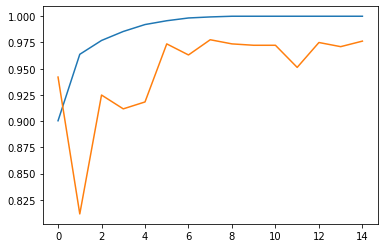

In [28]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

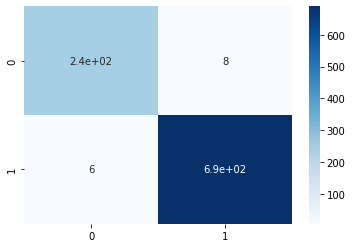

In [29]:
sns.heatmap(confusion_matrix(Y_test, y_prob), annot=True, cmap='Blues')

In [30]:
#saving model
model1.save_weights("/content/drive/MyDrive/Mini_Project_V/TESTCNN.hdf5",overwrite=True)